In [ ]:
# Test 6-1 Dataset 4 v2

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-24 00:46:31.640078: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 00:46:31.640135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 00:46:31.647218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-24 00:46:31.665064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 00:46:32.981456: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_6_1/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_6_1/test'

In [3]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 11000 files belonging to 2 classes.


2024-04-24 00:46:54.967225: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 00:46:54.967563: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 00:46:54.967858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


In [ ]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [5]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [6]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [7]:
checkpoint_filepath = 'models/6-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)



In [8]:
# Best Epoch = ?
history = model.fit(train_dataset, epochs=30, batch_size=32, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/30


2024-04-24 00:48:35.670094: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-24 00:48:35.822539: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 00:48:38.347967: I external/local_xla/xla/service/service.cc:168] XLA service 0x7faf62dbfe50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 00:48:38.348037: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-04-24 00:48:38.368103: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713916118.459413  285166 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


344/344 [==============================] - ETA: 0s - loss: 0.6907 - acc: 0.5279
Epoch 1: val_loss improved from inf to 0.68431, saving model to models/6-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-001.ckpt/assets


344/344 [==============================] - 53s 132ms/step - loss: 0.6907 - acc: 0.5279 - val_loss: 0.6843 - val_acc: 0.5202
Epoch 2/30
344/344 [==============================] - ETA: 0s - loss: 0.6661 - acc: 0.5928
Epoch 2: val_loss improved from 0.68431 to 0.64611, saving model to models/6-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-002.ckpt/assets


344/344 [==============================] - 40s 116ms/step - loss: 0.6661 - acc: 0.5928 - val_loss: 0.6461 - val_acc: 0.6152
Epoch 3/30
344/344 [==============================] - ETA: 0s - loss: 0.6368 - acc: 0.6274
Epoch 3: val_loss improved from 0.64611 to 0.62951, saving model to models/6-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-003.ckpt/assets


344/344 [==============================] - 39s 114ms/step - loss: 0.6368 - acc: 0.6274 - val_loss: 0.6295 - val_acc: 0.6368
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.6197 - acc: 0.6482
Epoch 4: val_loss improved from 0.62951 to 0.61685, saving model to models/6-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-004.ckpt/assets


344/344 [==============================] - 39s 112ms/step - loss: 0.6197 - acc: 0.6482 - val_loss: 0.6169 - val_acc: 0.6574
Epoch 5/30
344/344 [==============================] - ETA: 0s - loss: 0.5959 - acc: 0.6709
Epoch 5: val_loss improved from 0.61685 to 0.60766, saving model to models/6-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-005.ckpt/assets


344/344 [==============================] - 40s 115ms/step - loss: 0.5959 - acc: 0.6709 - val_loss: 0.6077 - val_acc: 0.6596
Epoch 6/30
344/344 [==============================] - ETA: 0s - loss: 0.5665 - acc: 0.6956
Epoch 6: val_loss improved from 0.60766 to 0.57566, saving model to models/6-1/ch-006.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-006.ckpt/assets


344/344 [==============================] - 40s 114ms/step - loss: 0.5665 - acc: 0.6956 - val_loss: 0.5757 - val_acc: 0.6928
Epoch 7/30
344/344 [==============================] - ETA: 0s - loss: 0.5241 - acc: 0.7364
Epoch 7: val_loss improved from 0.57566 to 0.57308, saving model to models/6-1/ch-007.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-007.ckpt/assets


344/344 [==============================] - 40s 117ms/step - loss: 0.5241 - acc: 0.7364 - val_loss: 0.5731 - val_acc: 0.6972
Epoch 8/30
344/344 [==============================] - ETA: 0s - loss: 0.4639 - acc: 0.7808
Epoch 8: val_loss improved from 0.57308 to 0.51885, saving model to models/6-1/ch-008.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-008.ckpt/assets


344/344 [==============================] - 40s 115ms/step - loss: 0.4639 - acc: 0.7808 - val_loss: 0.5189 - val_acc: 0.7406
Epoch 9/30
344/344 [==============================] - ETA: 0s - loss: 0.3951 - acc: 0.8215
Epoch 9: val_loss improved from 0.51885 to 0.45927, saving model to models/6-1/ch-009.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-009.ckpt/assets


344/344 [==============================] - 40s 115ms/step - loss: 0.3951 - acc: 0.8215 - val_loss: 0.4593 - val_acc: 0.7922
Epoch 10/30
344/344 [==============================] - ETA: 0s - loss: 0.3123 - acc: 0.8699
Epoch 10: val_loss improved from 0.45927 to 0.41908, saving model to models/6-1/ch-010.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-010.ckpt/assets


344/344 [==============================] - 39s 111ms/step - loss: 0.3123 - acc: 0.8699 - val_loss: 0.4191 - val_acc: 0.8170
Epoch 11/30
344/344 [==============================] - ETA: 0s - loss: 0.2346 - acc: 0.9087
Epoch 11: val_loss improved from 0.41908 to 0.34932, saving model to models/6-1/ch-011.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-011.ckpt/assets


344/344 [==============================] - 39s 112ms/step - loss: 0.2346 - acc: 0.9087 - val_loss: 0.3493 - val_acc: 0.8550
Epoch 12/30
344/344 [==============================] - ETA: 0s - loss: 0.1658 - acc: 0.9362
Epoch 12: val_loss improved from 0.34932 to 0.31467, saving model to models/6-1/ch-012.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-012.ckpt/assets


344/344 [==============================] - 41s 117ms/step - loss: 0.1658 - acc: 0.9362 - val_loss: 0.3147 - val_acc: 0.8744
Epoch 13/30
344/344 [==============================] - ETA: 0s - loss: 0.1141 - acc: 0.9587
Epoch 13: val_loss improved from 0.31467 to 0.30065, saving model to models/6-1/ch-013.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-013.ckpt/assets


344/344 [==============================] - 39s 113ms/step - loss: 0.1141 - acc: 0.9587 - val_loss: 0.3007 - val_acc: 0.8830
Epoch 14/30
344/344 [==============================] - ETA: 0s - loss: 0.0767 - acc: 0.9725
Epoch 14: val_loss did not improve from 0.30065
344/344 [==============================] - 39s 112ms/step - loss: 0.0767 - acc: 0.9725 - val_loss: 0.3224 - val_acc: 0.8872
Epoch 15/30
344/344 [==============================] - ETA: 0s - loss: 0.0561 - acc: 0.9811
Epoch 15: val_loss improved from 0.30065 to 0.28729, saving model to models/6-1/ch-015.ckpt
INFO:tensorflow:Assets written to: models/6-1/ch-015.ckpt/assets


INFO:tensorflow:Assets written to: models/6-1/ch-015.ckpt/assets


344/344 [==============================] - 40s 116ms/step - loss: 0.0561 - acc: 0.9811 - val_loss: 0.2873 - val_acc: 0.9026
Epoch 16/30
344/344 [==============================] - ETA: 0s - loss: 0.0399 - acc: 0.9873
Epoch 16: val_loss did not improve from 0.28729
344/344 [==============================] - 41s 116ms/step - loss: 0.0399 - acc: 0.9873 - val_loss: 0.3149 - val_acc: 0.9020
Epoch 17/30
344/344 [==============================] - ETA: 0s - loss: 0.0310 - acc: 0.9900
Epoch 17: val_loss did not improve from 0.28729
344/344 [==============================] - 40s 115ms/step - loss: 0.0310 - acc: 0.9900 - val_loss: 0.2949 - val_acc: 0.9154
Epoch 18/30
344/344 [==============================] - ETA: 0s - loss: 0.0246 - acc: 0.9924
Epoch 18: val_loss did not improve from 0.28729
344/344 [==============================] - 40s 114ms/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.3591 - val_acc: 0.9050
Epoch 19/30
344/344 [==============================] - ETA: 0s - loss: 0.0184 - acc:

In [10]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=32)
print(val_loss, val_acc)

157/157 [==============================] - 8s 46ms/step - loss: 0.4571 - acc: 0.9156
0.45714956521987915 0.9156000018119812


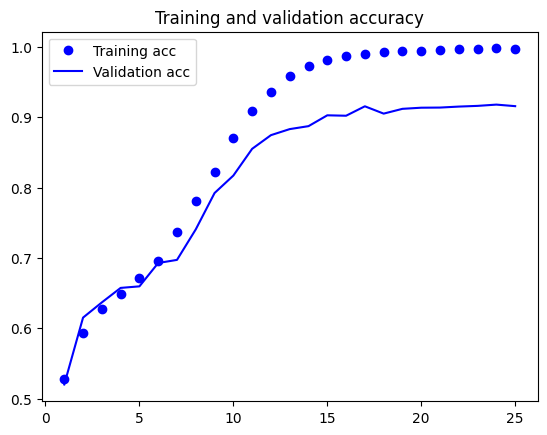

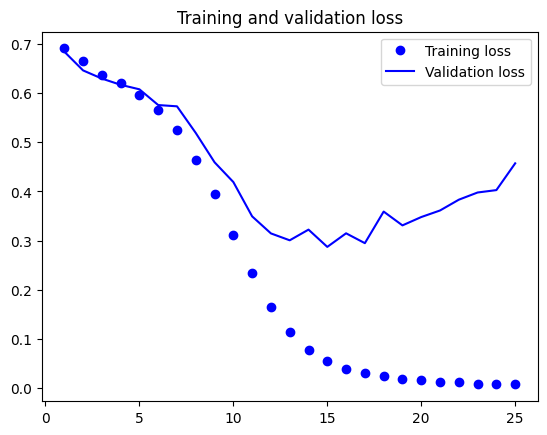

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/6-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/6-1/train_test_acc",dpi=100)
plt.show()

In [15]:
# save history data to file
import os
# save data
np.save('history/6-1/acc',acc)
np.save('history/6-1/val_acc',val_acc)
np.save('history/6-1/loss',loss)
np.save('history/6-1/val_loss',val_loss)

In [ ]:
model = keras.models.load_model('models/6-1/model.keras')

In [18]:
model.save('models/6-1/model.keras')

In [19]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 5000 files belonging to 2 classes.
1/1 [==============================] - 0s 18ms/step
5000
0
422


In [20]:
# write the wrong filenames to a file
with open('results/6-1/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)

In [23]:
import csv
import os

output_csv = 'results/6-1/failed_circles_cut.csv'
failed_filenames_txt = 'results/6-1/failed_filenames.txt'
source_file = '../../Dataset_Scripts/Datasets/Dataset_6_1/data/circles_cut.csv'

# Extract short filenames from failed_filenames.txt
failed_filenames = set()
with open(failed_filenames_txt, 'r') as f1:
    for line in f1:
        filename = os.path.basename(line.strip())  # Get short filename
        failed_filenames.add(filename)

# Open output CSV file for writing
out = open(output_csv, 'w', newline='')
out_writer = csv.writer(out)

# Iterate over rows in squares.csv
with open(source_file, 'r') as f:
    reader = csv.DictReader(f)
    # Write header to output CSV
    out_writer.writerow(reader.fieldnames)
    # Iterate over rows
    for row in reader:
        # Extract filename from the current row
        filename = os.path.basename(row['Filename'])
        # Check if filename is in the set of failed filenames
        if filename in failed_filenames:
            # Write the row to the output CSV
            out_writer.writerow(row.values())

# Close output CSV file
out.close()

In [24]:
import shutil
output_folder = 'results/6-1/failed_images'
file_name = 'results/6-1/failed_filenames.txt'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with open(file_name, 'r') as file:
    lines = file.readlines()

for line in lines:
    line = line.strip()
    if os.path.exists(line):
        filename = os.path.basename(line)
        shutil.copy(line, os.path.join(output_folder, filename))
    else:
        print(f"Image path '{line}' does not exist.")